In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('Advertising.csv')

In [61]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [62]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [63]:
df.shape

(200, 5)

In [64]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [66]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [67]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

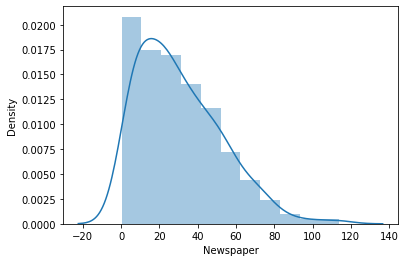

In [69]:
sns.distplot(df['Newspaper'])

In [70]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [71]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [72]:
data = df.copy()

In [73]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

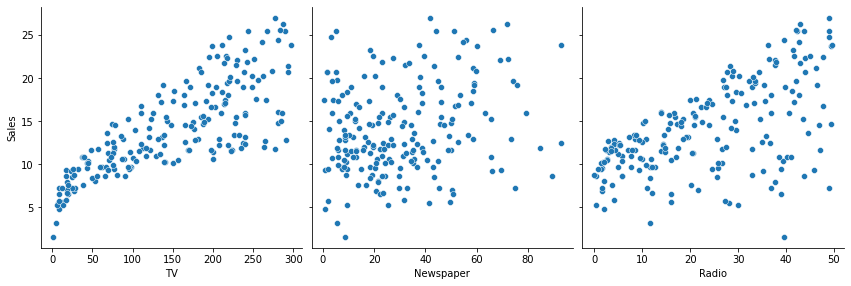

In [74]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

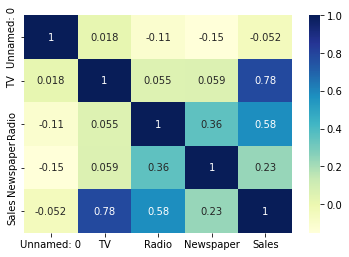

In [75]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [76]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [77]:
print(important_features)

['TV', 'Radio', 'Sales']


In [78]:
x = data['TV']
y = data['Sales']

In [79]:
x = x.values.reshape(-1,1)

In [80]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [81]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [82]:
print(x.shape,y.shape)

(200, 1) (200,)


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [84]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [85]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [86]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [87]:
knn_train_pred = knn.predict(x_train)

In [88]:
knn_test_pred = knn.predict(x_test)

In [89]:
print(knn_train_pred, knn_test_pred)

[ 9.98 12.52 14.12 16.28  8.58 14.86 11.76  6.24 21.44 14.92 10.66 21.44
 14.2  10.66  4.3  14.2  11.42  4.3  15.26  7.26 19.76 11.12 16.3  11.46
 15.56 11.42 21.74 13.58 19.02  7.26 10.88 10.66 11.54 17.66 12.14 14.66
  6.24 14.5   7.18  7.26 13.22  7.18  9.98  8.58 14.5  18.84 11.94 15.2
 12.56 10.16 13.7  21.44  9.1   9.98 17.28 19.28 20.06 12.4   6.88 10.16
 19.28 20.06  8.58 18.26  7.18 15.2  16.12 13.2   7.18 16.64  9.68 22.7
 14.92 15.72 15.56 21.74 14.76 16.32 14.88  8.58 12.52  9.48 18.72 16.28
 18.26 18.5  17.36 12.52 12.64 10.58 16.2   9.68 10.66 13.7  10.88  8.58
 17.26 10.88 14.26 21.44 13.24 16.98 14.88 15.38 17.54 13.22 19.2  15.38
 11.42 15.08 11.24 17.66 15.92 19.64 15.56 11.94 14.02 13.7  13.78  9.98
  5.42 16.28 16.28  9.98 21.74 10.1   5.42 13.22 15.56 19.22 14.76  6.24
 15.92 14.2 ] [11.54 18.26 17.54 14.88 16.58 13.2  20.82 10.84 21.28 21.28  9.98 12.
 15.38 12.52 13.24 20.06  8.64 19.64 14.5   8.58 10.18 15.56 10.3  21.44
 16.36 15.56 15.38  6.88 10.16 23.3  16.2

In [90]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2', 'Test RMSE','Variance'])

In [91]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train, 'Test R2':r2, 'Test RMSE': rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.4009800574331296
RMSE: 4.158668201734927


In [92]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.706209,0.40098,4.158668,0.305229


In [93]:
svr = SVR().fit(x_train, y_train)
svr

SVR()

In [94]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [95]:
print(svr_train_pred, svr_test_pred)

[11.75772891 13.30243867 12.11795718 15.65204213  8.45755718 17.4491812
 10.85884826  7.82704718 18.62819636 14.75095294 10.56773672 18.64527499
 13.76469097 10.6057151   7.73969621 13.76014699 11.47926646  7.69487523
 17.62076678  8.06505352 17.04531032 10.67147991 17.37474994 10.80029184
 17.98137392 11.42530636 18.51069264 12.77010671 18.4044861   8.0998265
 10.92982464 10.45697764 11.01254824 17.22594848 13.10223885 14.08122754
  7.90484024 14.5200343   8.16166368  8.07535779 12.5793409   8.12850707
 11.76855584  8.40478704 14.57991785 18.59434799 10.89448716 17.55004416
 12.46125214  8.94281919 12.23293859 18.63317039  8.67528147 11.64827198
 16.60425137 16.96856616 18.53929972 11.32314127  7.94443301  9.07641442
 17.00029171 18.57413308  8.48890645 18.2326105   8.15421532 13.65211093
 17.78648986 13.39084454  8.132145   15.68274726  9.54034178 18.59743317
 14.66016931 16.51281974 17.95470764 18.57157827 16.22337193 16.78409712
 17.88977432  8.38317572 13.30661269  9.95699883 17.0

In [96]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5516281999431041
RMSE: 3.597930551638477


In [97]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.706209,0.400980,4.158668,0.305229
1,Support Vector Machine,0.617639,0.551628,3.597931,0.066010


In [98]:
import statsmodels.api as sm

In [99]:
x_train_constant = sm.add_constant(x_train)

In [100]:
model = sm.OLS(y_train, x_train_constant).fit()

In [101]:
model.params

const    6.867032
x1       0.048090
dtype: float64

In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     237.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.90e-31
Time:                        17:03:06   Log-Likelihood:                -339.02
No. Observations:                 134   AIC:                             682.0
Df Residuals:                     132   BIC:                             687.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8670      0.514     13.356      0.0

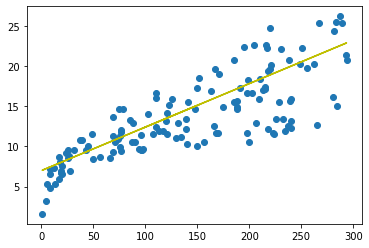

In [103]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [104]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

32    -1.941420
116   -1.361217
94    -0.531942
154   -0.298412
72     0.644145
         ...   
92     2.063685
9     -5.875496
5     -0.085419
96    -4.669698
3      4.347270
Name: Sales, Length: 134, dtype: float64

In [105]:
y_train_pred

array([11.54142016, 13.56121747, 12.03194237, 15.8984115 ,  8.15585515,
       17.72584716, 10.45938589,  7.28060965, 20.53913627, 15.05202025,
       10.1564163 , 20.39967407, 14.07097584, 10.19488863,  7.0642028 ,
       14.0661668 , 11.18074207,  6.9006954 , 17.93263593,  7.67976007,
       17.27379729, 10.2622152 , 17.63928442, 10.39686836, 18.41354005,
       11.1134155 , 20.9863771 , 12.91199691, 19.14932336,  7.72785048,
       10.53633055, 10.04580835, 10.62770233, 17.47096798, 13.32557445,
       14.39799064,  7.42968993, 14.83080435,  7.80960418,  7.6941872 ,
       12.66192677,  7.76632281, 11.55584729,  8.09814666, 14.88851285,
       19.7023631 , 10.49785822, 17.84607319, 12.50322841,  8.64156831,
       12.19064073, 20.50547298,  8.38188009, 11.39714893, 16.81693837,
       17.19204359, 19.50038337, 10.98838042,  7.49701651,  8.76660339,
       17.22570688, 19.6206094 ,  8.18951844, 18.81269047,  7.7999861 ,
       13.95074981, 18.14423375, 13.66220734,  7.77113186, 15.92

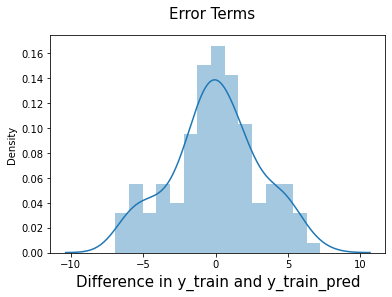

In [106]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

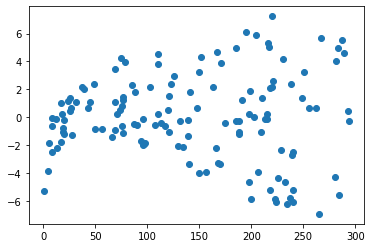

In [107]:
plt.scatter(x_train, res)
plt.show()

In [108]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [109]:
y_pred

array([10.72388316, 18.83192664, 17.56233976, 18.28369594, 16.15809973,
       13.739152  , 20.0293779 , 11.69530948, 20.18326722, 20.17364914,
       11.3827218 , 13.41694624, 15.1626282 , 13.49869994, 13.17168513,
       19.51000145,  8.24241789, 17.36997811, 14.72981449,  8.06929241,
        9.6322308 , 18.40392197,  9.86306478, 20.34196558, 15.37903505,
       18.49048471, 15.31651751,  7.50182555,  8.70408585, 20.62088997,
       15.64834136, 14.7779049 , 16.68228522, 10.12756205, 16.81212933,
       11.89728921, 19.63984556, 13.5756446 ,  7.27099157, 12.44551991,
       13.36885582,  8.93972887, 17.83164607, 18.56262033, 16.47549645,
        8.69446777, 11.21440536, 16.18214493,  9.00705545, 19.43305679,
        7.21809212, 15.37903505,  7.6941872 , 20.84691491, 10.08428068,
       19.0723787 , 16.43221508,  9.43986916, 17.79317374, 17.00449098,
        9.73322067, 17.13433509, 15.56177862, 10.47862206, 21.12103026,
       17.90378169])

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [111]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.626304624236569

In [112]:
r2 = r2_score(y_test, y_pred)
r2

0.5445283970994761

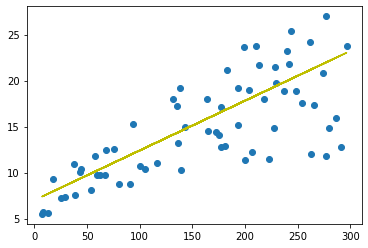

In [113]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()